![Numpy Logo](notebook_diagrams/numpy.jpeg)

# Tutorial for NumPy
NumPy, which is short for "Numbers Python", is a library for efficiently processing large volumes of numerical data in Python.  Like pandas, it is extremely important for machine learning, particularly for computer vision.  

The core data structure in NumPy is the **nd-array** (n-dimensional array).  This data structure uses [strided memory](https://en.wikipedia.org/wiki/Stride_of_an_array) for storing elements and computation, which means that all elements of the same nd-array must be of the same Python type.

In this tutorial, we will show you the power of NumPy, and in particular, how it can be used for computer vision.

## Import Block
Typically you will see `import numpy as np` written, but this is just convention.  You can write this import statement in whatever way works best for you.

In [1]:
# Import NumPy
import numpy as np 

# We will use os to find specific paths in our directories
import os

# Use for timing computation
import time

# Use for plotting
import matplotlib.pyplot as plt

## Intro to nd-arrays
The **nd-array**, or n-dimensional array, data structure is the core element of the numpy library.  In one dimension, they are very similar to the Python `list` data structure.  In two dimensions, you can think of these as nd-arrays as being similar to a `list` of `lists`.

The main difference between a native Python `list` and a numpy `nd-array` is that an `nd-array` is much more computationally efficient.  Let's see this below.

### Why Numpy Arrays?  Comparing Times to Compute

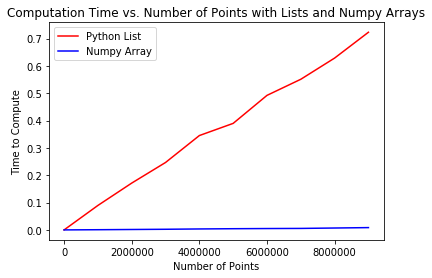

List Times 
 [1.9073486328125e-06, 0.08954048156738281, 0.1713273525238037, 0.2467031478881836, 0.3452184200286865, 0.3897683620452881, 0.4922502040863037, 0.5511496067047119, 0.6287484169006348, 0.7231781482696533]
Numpy Array Times 
 [4.315376281738281e-05, 0.0007331371307373047, 0.0015549659729003906, 0.0023741722106933594, 0.003509998321533203, 0.0043926239013671875, 0.005019426345825195, 0.00547480583190918, 0.006953001022338867, 0.008445262908935547]


In [2]:
# Store time to compute for Python list and numpy nd-array
list_times = []
nd_array_times = []
num_points = []

for i in range(10,10000010,1000000):
    
    num_points.append(i)
    
    python_list = [j for j in range(i)]
    t_list_start = time.time()
    total = 0
    for elt in python_list:
        total += elt
    t_list_end = time.time()
    list_times.append(t_list_end - t_list_start)
        
    np_array = np.arange(i)
    t_array_start = time.time()
    total = np.sum(np_array)
    t_array_end = time.time()
    nd_array_times.append(t_array_end - t_array_start)
    
# Plot both
plt.plot(num_points, list_times, color="r", label="Python List")
plt.plot(num_points, nd_array_times, color="b", label="Numpy Array")
plt.legend()
plt.xlabel("Number of Points")
plt.ylabel("Time to Compute")
plt.title("Computation Time vs. Number of Points with Lists and Numpy Arrays")
plt.show()

# Show the times
print("List Times \n {}".format(list_times))
print("Numpy Array Times \n {}".format(nd_array_times))

As we can see, numpy is significantly faster for **vector** and **matrix** operations, such as adding an array of numbers.  We will be using numpy a lot this week and next week to greatly speed up our code.

### Basic Operations with **nd-arrays**
Let's start working with these data structures!

#### Creating Numpy Arrays

In [3]:
# Can create numpy arrays using the following function
A = np.array([1, 2, 3, 4])
print("A is: \n {}".format(A))

# Can also create numpy arrays from lists!
B = [1, 2, 3, 4]  # List in Python
C = np.array(B)
print("C is: \n {}".format(C))

# Elements do not have to be integers
D = [0.01, -5.7, 10.2, 0.000076]
print("D is: \n {}".format(D))


A is: 
 [1 2 3 4]
C is: 
 [1 2 3 4]
D is: 
 [0.01, -5.7, 10.2, 7.6e-05]


#### Dimensionality, Row, and Column Vectors
We can think of nd-arrays as vectors (in one dimension), matrices (in two dimensions), or tensors (any dimension).  Numpy has many different ways in which we can get information on or change the dimensions of these nd-arrays.


In [4]:
# Create a "row vector":
E = np.array([[1, 2, 3, 4]])
print("E is: \n {}".format(E))

# We can get the shape of a nd-array through the "shape" attribute
print("Shape of E is: {}".format(E.shape))

# Now let's create a "column vector"
F = np.array([[1], [2], [3], [4]])
print("F is: \n {}".format(F))

# We can get the shape of a nd-array through the "shape" attribute
print("Shape of F is: {}".format(F.shape))

# We can also change a row vector to a column vector through taking the transpose!
G = np.array(E).T  # Take the transpose with ".T"
print("G is: \n {}".format(G))

# We can get the shape of a nd-array through the "shape" attribute
print("Shape of G is: {}".format(G.shape))

print("F and G have the same shape!")

E is: 
 [[1 2 3 4]]
Shape of E is: (1, 4)
F is: 
 [[1]
 [2]
 [3]
 [4]]
Shape of F is: (4, 1)
G is: 
 [[1]
 [2]
 [3]
 [4]]
Shape of G is: (4, 1)
F and G have the same shape!


#### Matrices in Numpy
Much of computer vision deals with operations on matrices.  Numpy has a great amount of functionality built in for handling computations and transformations on matrices.  Let's see this below.

In [5]:
# Create the array
H = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print("H is: \n \n {}".format(H))

# We can get the shape of a nd-array through the "shape" attribute
print("\n Shape of H is: {}".format(H.shape))

# We can also use the reshape function to change the dimensions of a nd-array
print("Reshaped H into 1 x 9 column vector: \n %s \n" % H.reshape((1, 9)))
print("Reshaped H into 9 x 1 column vector: \n %s \n" % H.reshape((9, 1)))

H is: 
 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

 Shape of H is: (3, 3)
Reshaped H into 1 x 9 column vector: 
 [[1 2 3 4 5 6 7 8 9]] 

Reshaped H into 9 x 1 column vector: 
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] 



#### Some Common Vector Operations in Python
We can now explore some common types of vector data in Python.

###### 1. np.arange(start, stop, step rate)
This function creates an array over a linear interval from start to stop with a given step size given by step rate.  This function can be used to generate equally-spaced arrays, which are applicable for domains like plotting.

In [6]:
# Create the array with np.arange
I = np.arange(0,100,10)

print("I is: \n \n {}".format(I))

# We can get the shape of a nd-array through the "shape" attribute
print("\n Shape of I is: {}".format(I.shape))


I is: 
 
 [ 0 10 20 30 40 50 60 70 80 90]

 Shape of I is: (10,)


###### 2. np.sum(Array, axis = ?)
This function computes the sum of a given array over the axis given by the (optional) axis argument.  If no argument is provided for axis, this function sums over all the elements in the array.  A diagram for axes is provided below:

![Axis Diagram](notebook_diagrams/axes.png)

As we can see from the diagram above, summing over the rows corresponds to "axis = 1", while summing over the columns corresponds to "axis = 0".  This is consistent with how numpy computes shape - the 0 index of array.shape corresponds to the length of/over the columns, and the 1 index of array.shape corresponds to the length of/over the rows.  We will investigate how axis affects our output below.

In [7]:
# Create the 2D array
J = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print("J is: {}".format(J))

# We can get the shape of a nd-array through the "shape" attribute
print("Shape of J is: {}".format(J.shape))

# Now let's compute sums over these arrays!
K = np.sum(J, axis=None)  # No axis
print("K is: {}".format(K))
print("\n Shape of K is: {} \n".format(K.shape))

L = np.sum(J, axis=0)  # Axis = 0
print("L is: {}".format(L))
print("Shape of L is: {} \n".format(L.shape))

M = np.sum(J, axis=1)  # Axis = 1
print("M is: {}".format(M))
print("Shape of M is: {}".format(M.shape))

J is: [[1 2 3]
 [4 5 6]
 [7 8 9]]
Shape of J is: (3, 3)
K is: 45

 Shape of K is: () 

L is: [12 15 18]
Shape of L is: (3,) 

M is: [ 6 15 24]
Shape of M is: (3,)


##### 3. Elementary Math Operations in numpy: Addition, Subtraction, Multiplication, Division, Matrix Multiplication
Elementary operations in numpy are especially powerful because of a procedure numpy uses known as [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html), which is describes a set of rules numpy uses to perform computations between arrays of different sizes.  We will see this below when introducing some of these operations.

One really neat thing about broadcasting is that we can add, subtract, multiply, and divide matrices by scalars!

In [8]:
# Create two arrays
N = np.array([[1, 2], [3, 4]])
O = np.array([[5, 6], [7, 8]])
print("N is: \n {} \n \n O is: \n {} \n".format(N,O))

# Perform addition - np.add.  Note that this operation can be computed along an axis as well!
P = np.add(N, O)
print("Addition gives: \n {} \n".format(P))

# Perform subtraction - np.subtraction.  Note that this operation can be computed along an axis as well!
Q = np.subtract(N, O)
print("Subtraction gives: \n {} \n".format(Q))

# Perform element-wise multiplication - np.multiply.
R = np.multiply(N, O)
print("Element-wise Multiplication gives: \n {} \n".format(R))

# Perform element-wise division - np.divison.
S = np.divide(N, O)
print("Element-wise Division gives: \n {} \n".format(S))

# Now we'll broadcast - Add a matrix with a scalar!
AS = np.add(N, -5)
AT = np.divide(N, -5)
print("N is \n %s \n" % (N))
print("AS is \n %s \n" % (AS))
print("AT is \n %s \n" % (AT))

N is: 
 [[1 2]
 [3 4]] 
 
 O is: 
 [[5 6]
 [7 8]] 

Addition gives: 
 [[ 6  8]
 [10 12]] 

Subtraction gives: 
 [[ 6  8]
 [10 12]] 

Element-wise Multiplication gives: 
 [[ 5 12]
 [21 32]] 

Element-wise Division gives: 
 [[0.2        0.33333333]
 [0.42857143 0.5       ]] 

N is 
 [[1 2]
 [3 4]] 

AS is 
 [[-4 -3]
 [-2 -1]] 

AT is 
 [[-0.2 -0.4]
 [-0.6 -0.8]] 



##### 4. Generating Arrays of Arbitrary Size with Numpy
Another great thing about numpy is that it has many functions for creating arrays of any size.

In [9]:
# Create a matrix of all zeros
T = np.zeros((2, 2, 2))
print("T is: \n {} \n".format(T))

# Create a matrix of all ones
U = np.ones((7, 4))
print("U is: \n {}".format(U))

T is: 
 [[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]] 

U is: 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


##### 5. Generating Data From Probabilistic Distributions
Numpy also has powerful functionality built in for sampling random variables, vectors, and matrices of any size from different probability distributions.

In [10]:
# 5a. np.random.random(size=None): Samples uniformly from [0,1).  
#Can sample a single number, or a vector/matrix/tensor according to the size argument.
V = np.random.random(size=(5,5))
print("V is: \n {} \n".format(V))

W = np.random.random(size=None)
print("W is: \n {} \n".format(W))

V is: 
 [[0.03857766 0.26164093 0.75796476 0.8643626  0.90277747]
 [0.44408743 0.67944714 0.94516989 0.70807587 0.74298393]
 [0.20184196 0.25892449 0.20774916 0.27289    0.82662277]
 [0.24962328 0.81805161 0.88811365 0.408624   0.05402518]
 [0.8841062  0.11023505 0.68634103 0.94158232 0.08381174]] 

W is: 
 0.14254116054257326 



Y is: 
 [[13 13 21]
 [21  7 21]
 [21  7 21]] 



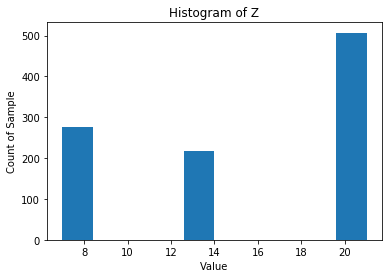

In [11]:
# 5b. np.random.choice(array): Samples uniformly from elements in the array argument.  
#Can sample a single number, or a vector/matrix/tensor according to the size argument.

X = np.array([7, 21, 21, 13])

Y = np.random.choice(X, size=(3,3))
print("Y is: \n {} \n".format(Y))

Z = np.random.choice(X, size=(1000))
plt.hist(Z)
plt.title("Histogram of Z")
plt.xlabel("Value")
plt.ylabel("Count of Sample")
plt.show()

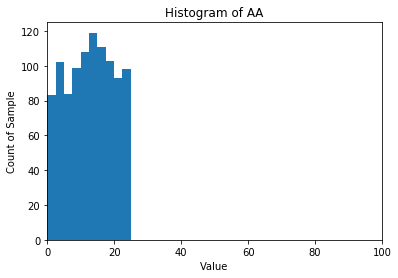

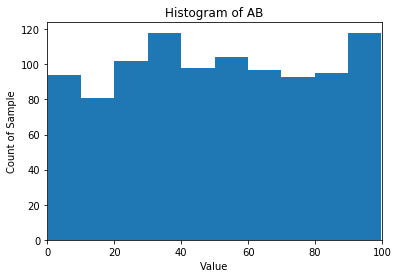

In [12]:
# 5c. np.random.uniform(low=0.0, high=1.0, size=None): Samples uniformly from the range [low, high).
#Can sample a single number, or a vector/matrix/tensor according to the size argument.

AA = np.random.uniform(low=0, high=25, size=(1000))
plt.hist(AA, bins=10)
plt.xlim(0, 100)
plt.title("Histogram of AA")
plt.xlabel("Value")
plt.ylabel("Count of Sample")
plt.show()

AB = np.random.uniform(low=0, high=100, size=(1000))
plt.hist(AB, bins=10)
plt.xlim(0, 100)
plt.title("Histogram of AB")
plt.xlabel("Value")
plt.ylabel("Count of Sample")
plt.show()


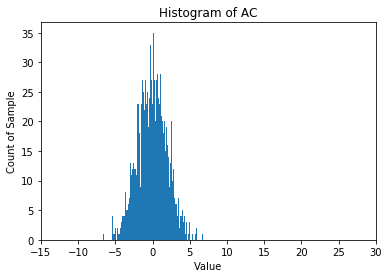

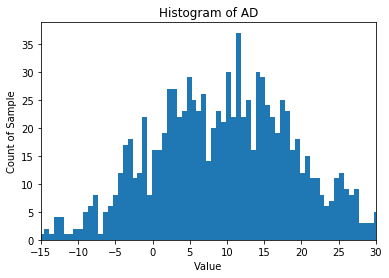

In [13]:
# 5d. numpy.random.normal(loc=0.0, scale=1.0, size=None): Samples from the Gaussian distribution, with
# loc = mean and scale = standard deviation.  Can sample a single number, or a vector/matrix/tensor 
# according to the size argument.

AC = np.random.normal(loc=0, scale=2, size=(1000))
plt.hist(AC, bins=100)
plt.xlim(-15, 30)
plt.title("Histogram of AC")
plt.xlabel("Value")
plt.ylabel("Count of Sample")
plt.show()

AD = np.random.normal(loc=10, scale=10, size=(1000))
plt.hist(AD, bins=100)
plt.xlim(-15, 30)
plt.title("Histogram of AD")
plt.xlabel("Value")
plt.ylabel("Count of Sample")
plt.show()

#### Statistical Functions in Numpy
In addition to generating probabilistic arrays using numpy, we can use statistical functions to summarize, predict, and make inferences.  These functions are explored below.

Parameters for normal distribution: 

Mean: 2, Variance: 9, Standard deviation: 3


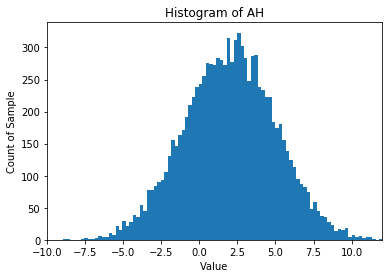

Mean of sampled points is: 2.0121346958218664, 
 Variance is: 8.991820031895939, 
 Standard deviation is: 2.9986363620645866 



In [14]:
# Generate distribution randomly
AH = np.random.normal(loc=2, scale=3, size=(10000)) 
print("Parameters for normal distribution: \n")
print("Mean: 2, Variance: 9, Standard deviation: 3")

# Plot histogram
plt.hist(AH, bins=100)
plt.xlim(xmin=-10.0, xmax = 12.0)
plt.title("Histogram of AH")
plt.xlabel("Value")
plt.ylabel("Count of Sample")
plt.show()

# Now find statistics
mean = np.mean(AH)
var = np.var(AH)
std = np.std(AH)

print("Mean of sampled points is: %s, \n Variance is: %s, \n Standard deviation is: %s \n" % (mean, var, std))

There are many other numpy functions that you can use for probability distributions as well!  Visit numpy's website [HERE](https://numpy.org/) to see their documentation.

### Slicing in numpy
Array slicing, or simply slicing for short, is another nice feature of numpy.  Numpy array slicing is supported for both single and multi-dimensional arrays, and also supports conditional array indexing (for example, you can return the subset of an array of elements that are greater than zero.  We can investigate slicing, as well as other functions for conditional element selection, below.

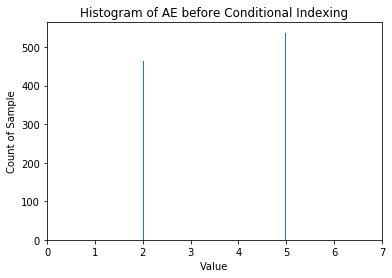

Number of samples equal to 2: 463, 
Number of samples equal to 5: 537


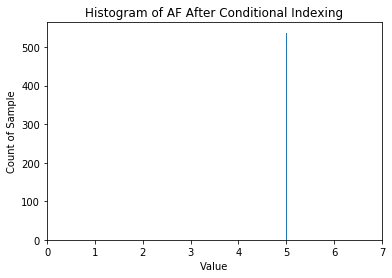

Number of 5s in AF array: 537


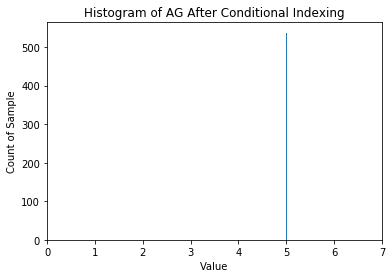

Number of 5s in AG array: 537 

Notice how AF and AG give us the same results!


In [15]:
# First, create bi-modal array of length 1000
AE = np.random.choice([2, 5], size=1000)
plt.hist(AE, bins=100)
plt.xlim(xmin=0.0, xmax = 7.0)
plt.title("Histogram of AE before Conditional Indexing")
plt.xlabel("Value")
plt.ylabel("Count of Sample")
plt.show()

# Now we can figure out the indices and counts of different values in the array above
where_2s = np.where(AE==2)[0]
where_5s = np.where(AE==5)[0]

# Print number of 2s and 5s
print("Number of samples equal to 2: %s, \n" \
       "Number of samples equal to 5: %s" % (len(where_2s), len(where_5s)))

# Now we only want to keep 5s!
AF = AE[where_5s]  # We can index into a numpy array using a list as input!
plt.hist(AF, bins=100)
plt.xlim(xmin=0.0, xmax = 7.0)
plt.title("Histogram of AF After Conditional Indexing")
plt.xlabel("Value")
plt.ylabel("Count of Sample")
plt.show()

# Print number of 5s
print("Number of 5s in AF array: %s" % (len(AF)))

# We can get 5s another way!
AG = AE[AE==5]
plt.hist(AG, bins=100)
plt.xlim(xmin=0.0, xmax = 7.0)
plt.title("Histogram of AG After Conditional Indexing")
plt.xlabel("Value")
plt.ylabel("Count of Sample")
plt.show()

# Print number of 5s
print("Number of 5s in AG array: %s \n" % (len(AF)))
print("Notice how AF and AG give us the same results!")



## Linear Algebra in Numpy - PCA
As we've seen above, numpy is very good at processing matrices efficiently and without the need for a lot of computation.  Because of this, it is a really good platform to use linear algebra with!  Let's write code for our own out-of-the-box PCA using numpy!

Here, we will only find the **principal components** (eigenvectors of the covariance matrix of the data), but we can easily generalize this framework to higher dimensions as well.

The numpy functions we use in this example:

1. `np.random.normal`: Function for generating samples from a normal distribution.


2. `np.vstack`: Function for stacking two vectors/matrices vertically (along the 0th axis).


3. `np.random.randint`: Function for sampling integers randomly.


4. `@`: Shorthand for matrix multiplication between commutative matrices.


5. `np.sin` and `np.cos`: Functions for computing the element-wise sine and cosine of elements in an array.  Functions like these are really powerful because numpy performs computations over each element by taking in the entire array.


6. `np.min` and `np.max`: Functions for computing the min and max of an array.


7. `np.mean`: Computes the statistical mean of an array or matrix.


8. `np.cov`: Computes the statistical covariance matrix of an array or matrix.


9. `np.linalg.eig`: Computes the eigenvector/eigenvalue pairs of a matrix.

Example 1: 

Covariance Matrix is given by: 
 [[ 1.36406831 -2.96359007]
 [-2.96359007 23.87387943]] 

Eigenvalues of covariance matrix: 
 [ 0.98042734 24.2575204 ] 

Eigenvectors of covariance matrix: 
 [[-0.99172502  0.12838022]
 [-0.12838022 -0.99172502]] 



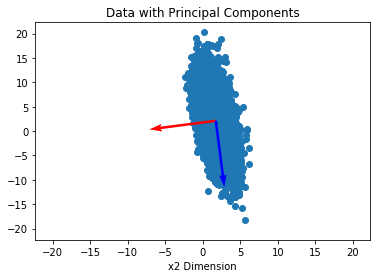

Example 2: 

Covariance Matrix is given by: 
 [[24.56895448  3.16841232]
 [ 3.16841232  1.44592136]] 

Eigenvalues of covariance matrix: 
 [24.9952443   1.01963154] 

Eigenvectors of covariance matrix: 
 [[ 0.99107006 -0.1333422 ]
 [ 0.1333422   0.99107006]] 



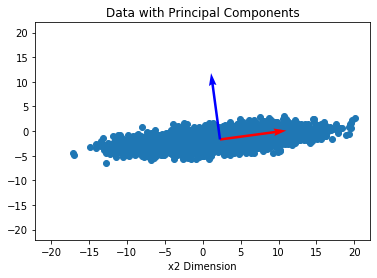

In [16]:
# First, we need to generate data - n corresponds to number of points
def generate_data(n=10000):
    
    # Generate the un-rotated data
    x1 = np.random.normal(loc=-2, scale=5, size=n)
    x2 = np.random.normal(loc=2, scale=1, size=n)
    stacked_data = np.vstack((x1, x2))

    # Generate a random angle for rotation
    theta = np.random.randint(low=0, high=360)
    
    # Make rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))

    # Rotate data
    return R @ stacked_data

def plot(D, vector=None):
    # Use for setting limits on plot window
    x1min, x1max = np.min(D[0]), np.max(D[0])
    x2min, x2max = np.min(D[1]), np.max(D[1])
    abs_lim = max(abs(x1min), abs(x1max), abs(x2min), abs(x2max))
    
    # Plot data
    plt.scatter(D[0], D[1])
    plt.xlim(-abs_lim*1.1, abs_lim*1.1)
    plt.ylim(-abs_lim*1.1, abs_lim*1.1)
    
    # Plot principal components of covariance matrix
    if vector is not None:
        origin = np.mean(D[0]), np.mean(D[1]) # origin point
        plt.quiver(*origin, vector[0,:], vector[1,:], color=['r','b'], scale=5)
        
    # Add axis captions and title
    plt.xlabel("x1 Dimension")
    plt.xlabel("x2 Dimension")
    plt.title("Data with Principal Components")
    
    # Now show the plot
    plt.show()
    
def PCA():
    # First, generate data
    D = generate_data()
    # Next, compute covariance matrix
    Sigma = np.cov(D)
    print("Covariance Matrix is given by: \n %s \n" % (Sigma))
    
    # Next, get eigenvectors and eigenvalues of covariance matrix
    lam, v = np.linalg.eig(Sigma)
    print("Eigenvalues of covariance matrix: \n %s \n" % (lam))
    print("Eigenvectors of covariance matrix: \n %s \n" % (v))

    
    # Show PCA in two dimensions
    plot(D, vector=v)

# Now we can call the function!
print("Example 1: \n")
PCA()
print("Example 2: \n")
PCA()



PCA is just one of many linear-algebra based problems in machine learning that can be solved using machine learning!

## Conclusions and Takeaways

Numpy is a powerful package for vector and matrix computation in Python.  In this tutorial, we've explored the following concepts:

1. Numpy nd-arrays

2. Axis, Shape, and Dimension

3. Probability and Statistics in Numpy

4. Slicing and Indexing in Numpy

5. Linear Algebra in Numpy with PCA

This tutorial covers a microscopic fraction of all the functionality built into [numpy](https://numpy.org/).  We highly encourage you to explore this library further!